Import Dependencies


---

In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

Import Data file and Save as Dataframe

---

In [2]:
# Import data file from Google drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/processed_salaries.csv")
df.head()

Mounted at /content/drive


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size,salary_binned
0,2024,EN,CT,Other,88888,Other,0,L,0
1,2024,EX,FT,Other,106666,Other,100,L,0
2,2024,EX,FT,Other,106666,Other,100,L,0
3,2024,SE,FT,Data Engineer,130500,US,0,M,0
4,2024,SE,FT,Data Engineer,96000,US,0,M,0


Data Pre-processing


---

Dropping unnecessary columns, converting strings to booleans using Pandas Get Dummies, and plitting the data.

In [3]:
# Convert categorical data to numeric with 'pd.get_dummies'
df = pd.get_dummies(df, columns=['experience_level', 'job_title', 'employee_residence'])
df.head()

,work_year,employment_type,salary_in_usd,remote_ratio,company_size,salary_binned,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,...,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Other,job_title_Research Engineer,job_title_Research Scientist,employee_residence_Other,employee_residence_US
0,2024,CT,88888,0,L,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2024,FT,106666,100,L,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2024,FT,106666,100,L,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2024,FT,130500,0,M,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,2024,FT,96000,0,M,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [4]:
# Drop unused columns
df = df.drop(columns=['work_year', 'salary_binned', 'employment_type', 'company_size'])
df.head()

,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Analytics Engineer,job_title_Applied Scientist,job_title_Business Intelligence Engineer,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Other,job_title_Research Engineer,job_title_Research Scientist,employee_residence_Other,employee_residence_US
0,88888,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,106666,100,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,106666,100,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,130500,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,96000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [5]:
# Split preprocessed data into features and target arrays. Here we make salary_in_usd as our target array as that is what we would like predicted
y = df['salary_in_usd'].values

X = df.drop(columns=['salary_in_usd']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Training models and retreiving accuracy scores


---

In [6]:
# Create an mlp classifier
mlp = MLPClassifier(activation='tanh', alpha=0.00021148999718383549, beta_1=0.999,
                beta_2=0.9, hidden_layer_sizes=(113, 113, 113),
                learning_rate_init=0.0007452270241186694, max_iter=256,
                n_iter_no_change=32, random_state=1, validation_fraction=0.0,
                verbose=0, warm_start=True)

In [7]:
# Train the model using using mlp
mlp_model = mlp.fit(X_train, y_train)

In [12]:
# Create predictions using the testing data
predictions = mlp_model.predict(X_test)

In [9]:
 # Print accuracy score
print('Test Acc: %.3f' % mlp_model.score(X_test, y_test))

Test Acc: 0.021


Compare predictions against actual values to show difference


---



In [13]:
# Create a copy of the original data
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(10)

In [14]:
# Add a new column to the DF showing the difference between prediction and actual value
results_df['Difference'] = results_df['Actual'] - results_df['Prediction']
results_df

,Prediction,Actual,Difference
0,130000,440000,310000
1,130000,100000,-30000
2,136000,118000,-18000
3,130000,130500,500
4,136000,250500,114500
5,136000,224800,88800
6,150000,145360,-4640
7,130000,85000,-45000
8,136000,214000,78000
9,130000,123040,-6960


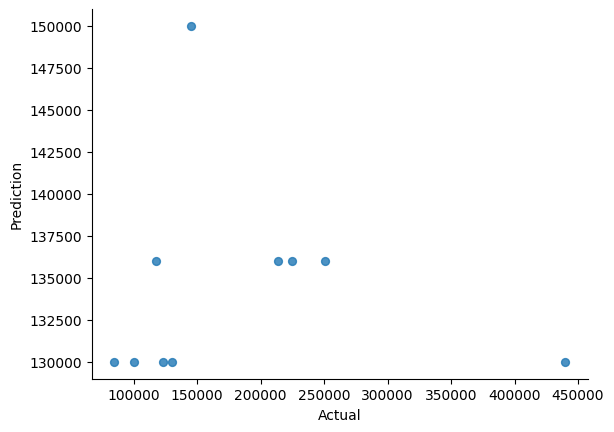

In [15]:
# Plot prediction values against actual values
from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Actual', y='Prediction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)